In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir=os.path.join('/content/drive/MyDrive/Data')

albo_dir=os.path.join(base_dir,'Trimeresurus_albolabris')
naja_dir=os.path.join(base_dir, 'naja_sputatrix')
retic_dir=os.path.join(base_dir, 'reticulatus_python')

In [ ]:
albo_files=os.listdir(albo_dir)

for i in range(10):
  print(albo_files[i])

images48.jpg
image18.jpeg
images102.jpg
ular-bangkai-laut-trimeresurus-albolabris-02.jpg
image31.jpeg
images116.jpg
images43.jpg
images94.jpg
images28.jpg
images49.jpg


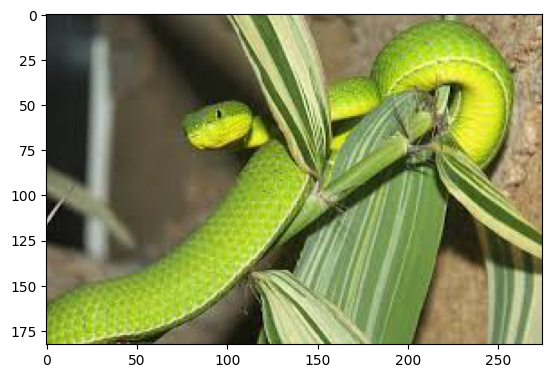

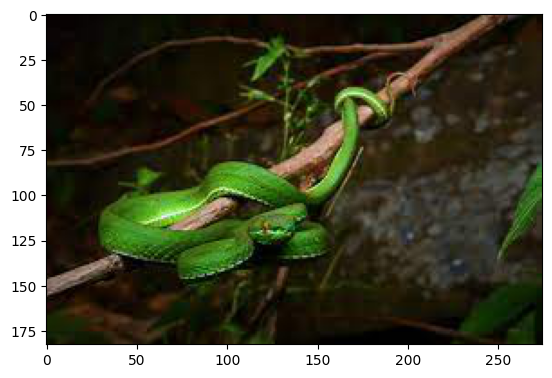

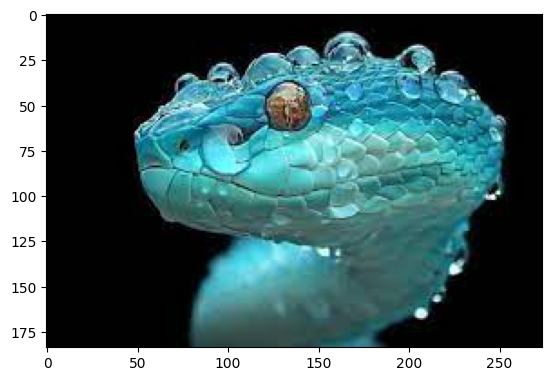

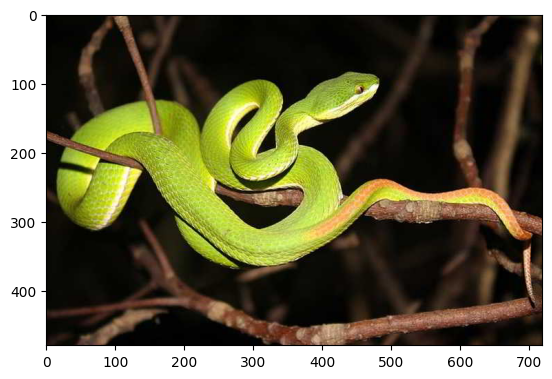

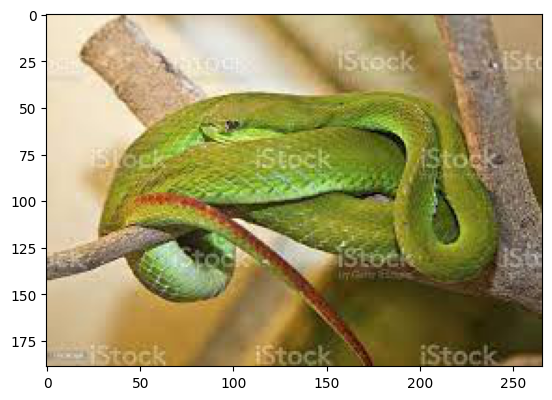

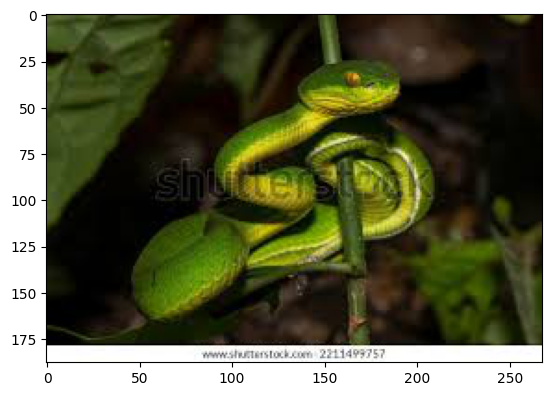

In [ ]:
import matplotlib.image as mpimg

for id,i in enumerate(albo_files):
  img_path=os.path.join(albo_dir,i)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()
  if id==5:
    break



In [ ]:
TRAINING_DIR=os.path.join('/content/drive/MyDrive/TRAIN_DIR')
VAL_DIR=os.path.join('/content/drive/MyDrive/VAL_DIR')

albo_train=os.path.join(TRAINING_DIR,'albo_train')
naja_train=os.path.join(TRAINING_DIR,'naja_train')
retic_train=os.path.join(TRAINING_DIR,'retic_train')

albo_val=os.path.join(VAL_DIR,'albo_val')
naja_val=os.path.join(VAL_DIR,'naja_val')
retic_val=os.path.join(VAL_DIR,'retic_val')

train_number=378




In [ ]:
import os

path = '/content/drive/MyDrive/TRAIN_DIR/albo_train'
num_files = len(os.listdir(path))

print("Number of files in directory:", num_files)

Number of files in directory: 378


In [ ]:
#hapus validation and train data
#def hapus_file(source):
 # x=os.listdir(source)
  #for i in x:
   # file=os.path.join(source,i)
    #try:
     ##print("File removed successfully.")
   # except OSError as e:
    #  print("Error: %s - %s." % (e.filename, e.strerror))

#hapus_file(albo_train)
#hapus_file(naja_train)
#hapus_file(retic_train)

#hapus_file(albo_train)
#hapus_file(naja_train)
#hapus_file(retic_train)



In [ ]:
import shutil
import random
"""def split_file(source,destination_train,destination_val,train_num):
  sources=os.listdir(source)
  random.shuffle(sources)
  sources_train=sources[:train_num]
  sources_val=sources[train_num:420]
  for i in sources_train:
    src_file=os.path.join(source,i)
    dst_file=os.path.join(destination_train,i)

    shutil.copyfile(src_file, dst_file)

  for i in sources_val:
    src_file=os.path.join(source,i)
    dst_file=os.path.join(destination_val,i)


    shutil.copyfile(src_file, dst_file)

split_file(albo_dir,albo_train,albo_val,train_number)
split_file(naja_dir,naja_train,naja_val,train_number)
split_file(retic_dir,retic_train,retic_val,train_number)



"""

'def split_file(source,destination_train,destination_val,train_num):\n  sources=os.listdir(source)\n  random.shuffle(sources)\n  sources_train=sources[:train_num]\n  sources_val=sources[train_num:420]\n  for i in sources_train:\n    src_file=os.path.join(source,i)\n    dst_file=os.path.join(destination_train,i)\n\n    shutil.copyfile(src_file, dst_file)\n\n  for i in sources_val:\n    src_file=os.path.join(source,i)\n    dst_file=os.path.join(destination_val,i)\n\n\n    shutil.copyfile(src_file, dst_file)\n\nsplit_file(albo_dir,albo_train,albo_val,train_number)\nsplit_file(naja_dir,naja_train,naja_val,train_number)\nsplit_file(retic_dir,retic_train,retic_val,train_number)\n\n\n\n'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:

pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                  include_top = False,
                                  weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False



87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Model

In [ ]:
x = tf.keras.layers.Flatten()(pre_trained_model.output)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(3,activation='softmax')(x)


In [26]:
model = Model(inputs=pre_trained_model.input, outputs=x)

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d_2[0][0]']               
 alization)                     )                                                           

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

steps_per_epoch = 1133 // 32
validation_step= 238//32
#TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = VAL_DIR
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=32,
  shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=32,
  shuffle=True
)

Found 1133 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=validation_step)

Epoch 1/100
20/20 [==============================] - 237s 11s/step - loss: 4.7773 - accuracy: 0.5878 - val_loss: 0.7712 - val_accuracy: 0.8125
Epoch 2/100
20/20 [==============================] - 195s 10s/step - loss: 0.5751 - accuracy: 0.8132 - val_loss: 0.2733 - val_accuracy: 0.9152
Epoch 3/100
20/20 [==============================] - 236s 12s/step - loss: 0.3646 - accuracy: 0.8734 - val_loss: 0.2434 - val_accuracy: 0.9107
Epoch 4/100
20/20 [==============================] - 230s 12s/step - loss: 0.3237 - accuracy: 0.8937 - val_loss: 0.1816 - val_accuracy: 0.9375
Epoch 5/100
20/20 [==============================] - 231s 12s/step - loss: 0.2161 - accuracy: 0.9098 - val_loss: 0.1600 - val_accuracy: 0.9420
Epoch 6/100
20/20 [==============================] - 229s 12s/step - loss: 0.2718 - accuracy: 0.8969 - val_loss: 0.1418 - val_accuracy: 0.9464
Epoch 7/100
20/20 [==============================] - 192s 10s/step - loss: 0.1950 - accuracy: 0.9187 - val_loss: 0.1746 - val_accuracy: 0.9509

In [ ]:
model.save('/content/drive/MyDrive/weights/model.h5')


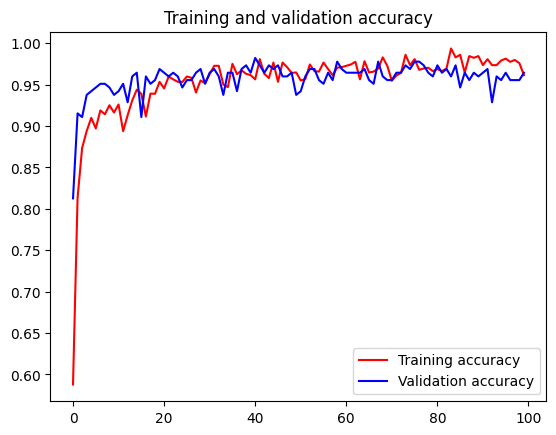

<Figure size 640x480 with 0 Axes>

In [ ]:


# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

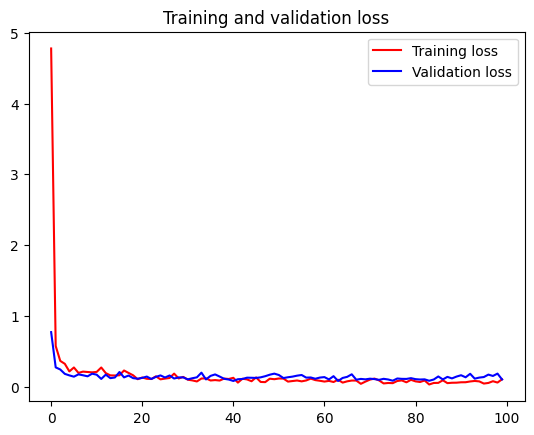

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()